# K-means Homework

## Equipo #4

- Jesús Omar Cuenca Espino      A01378844
- Luis Felipe Alvarez Sanchez   A01194173
- Juan José González Andrews    A01194101
- Rodrigo Montemayor Faudoa     A00821976

## Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATA_PATH = "data/"
moons = pd.read_csv(DATA_PATH+"moons.csv")
circles = pd.read_csv(DATA_PATH+"circles.csv")
blobs = pd.read_csv(DATA_PATH+"blobs.csv")

## Plotting the imported values

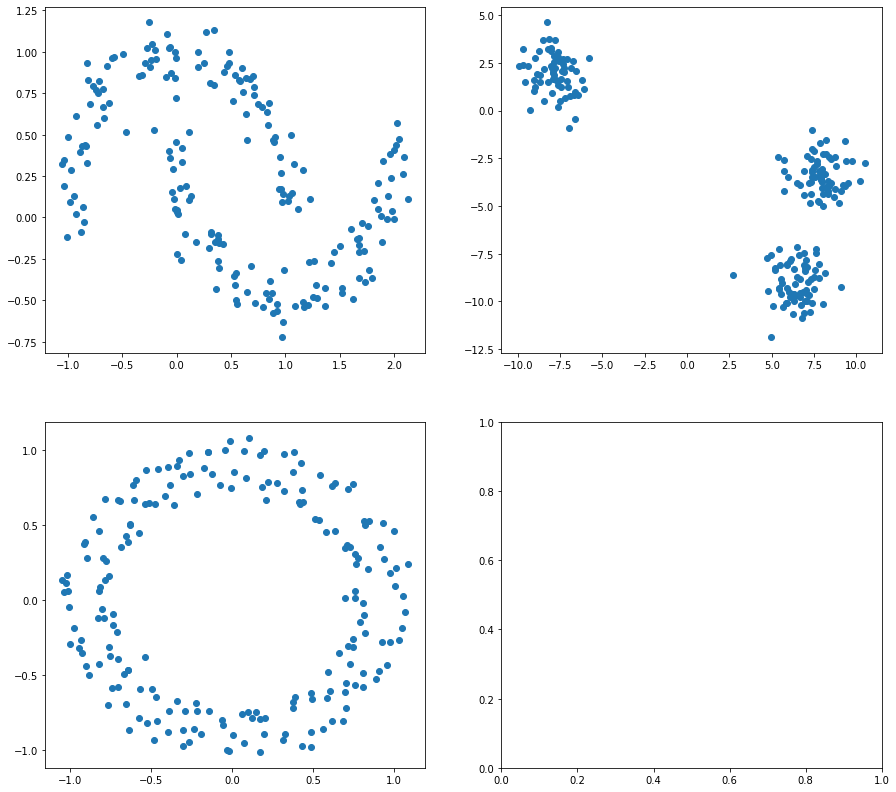

In [3]:
fig, (a1, a2) = plt.subplots(2,2, figsize=(15,14))

a1[0].scatter(x=moons.x1,y=moons.x2)
a2[0].scatter(x=circles.x1,y=circles.x2)
a1[1].scatter(x=blobs.x1,y=blobs.x2)



## Importing Scikit learn utilities

In [4]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Working the data 

First I'll work only with the blobs dataset and after a good algorithm has been defined, will use the other 2 datasets

### DataScaling

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(blobs)

In [6]:
scaled_data[:5]

array([[ 0.51943536,  0.003575  ],
       [-1.32112199,  0.91529844],
       [-1.38061205,  1.38041666],
       [ 0.51623942, -1.00240178],
       [-1.35257909,  1.03654037]])

## Iterating to find the optimal number of clusters (Elbow method)

In [7]:
from tqdm.notebook import tqdm

upper_limit = 12

limits = range(1,upper_limit)

sse = []
s_scores = []
centers = []
for k in tqdm(limits, desc="Checking for correct Number of Clusters"):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_data)
    centers.append(kmeans.cluster_centers_)
    sse.append(kmeans.inertia_)
    if(k>1):
        s_scores.append(silhouette_score(scaled_data, kmeans.labels_))

Checking for correct Number of Clusters:   0%|          | 0/11 [00:00<?, ?it/s]

## Checking Results for clusters

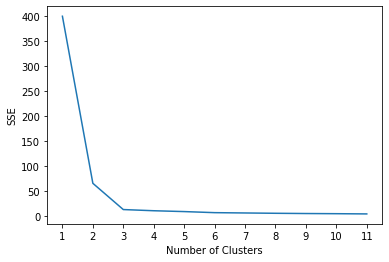

In [8]:
plt.plot(limits, sse)
plt.xticks(limits)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Checking Optimal Clusters using KneeLocator Class

In [9]:
optimal_clusters = KneeLocator(
   limits, sse, curve="convex", direction="decreasing"
).elbow
print(optimal_clusters)

cluster_centers = np.array(centers[optimal_clusters-1])
print(cluster_centers)

3
[[-1.40640797  1.19106251]
 [ 0.7953202   0.03119631]
 [ 0.5900966  -1.20448176]]


## Checking Efficiency per number of Clusters

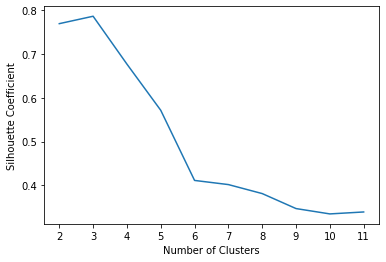

In [10]:
s_limits = range(2, upper_limit)
plt.plot(s_limits, s_scores)
plt.xticks(s_limits)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

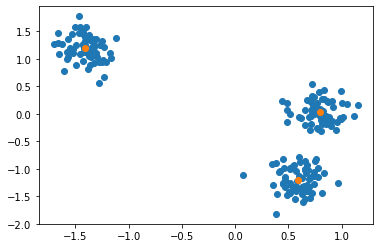

In [11]:
plt.scatter(x=scaled_data[:,0],y=scaled_data[:,1])
plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1])

# Defining a Function for the whole elbow method and analysis

In [12]:
from matplotlib.pyplot import figure

__scaler = StandardScaler()
__plots_proportions = (15,5)


def elbowAnalysis(data : pd.DataFrame, upper_limit : int):
    ## Scaling the data
    scaled_data = __scaler.fit_transform(data)
    
    ## Checking for the correct number of clusters
    limits = range(1,upper_limit)
    sse = []
    s_scores = []
    centers = []
    for k in tqdm(limits, desc="Checking for correct Number of Clusters"):
        kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
        kmeans.fit(scaled_data)
        centers.append(kmeans.cluster_centers_)
        sse.append(kmeans.inertia_)
        if(k>1):
            s_scores.append(silhouette_score(scaled_data, kmeans.labels_))
            
    ## Plotting the results
    
    ## Plotting the elbow graph for clusters
    figure(figsize=__plots_proportions, dpi=80)
    plt.plot(limits, sse)
    plt.xticks(limits)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

    ## Plotting the sillouette graph per clusters
    s_limits = range(2,upper_limit)

    figure(figsize=__plots_proportions, dpi=80)
    plt.plot(s_limits, s_scores)
    plt.xticks(s_limits)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()
    
    ## Obtaining optimal number of clusters 
    
    optimal_clusters = KneeLocator(
       limits, sse, curve="convex", direction="decreasing"
    ).elbow

    cluster_centers = np.array(centers[optimal_clusters-1])
    
    ## Plotting the results located above the orignal dataset
    
    figure(figsize=__plots_proportions, dpi=80)
    plt.scatter(x=scaled_data[:,0],y=scaled_data[:,1])
    plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1], s=14**2)
    plt.show()
    
    return cluster_centers, s_scores[optimal_clusters - 2]

### Support function to format the output

In [13]:
def formatElbowOutput(result):
    
    print(f"The optimal number of clusters is {len(result[0])}")
    
    for i,(x1,x2) in enumerate(result[0]):
        print(f"Center {i} -> [{x1},{x2}]")
        
    print(f"With a Sillouette score of -> {result[1]}")

## Testing functions with Blob DataSet

Checking for correct Number of Clusters:   0%|          | 0/14 [00:00<?, ?it/s]

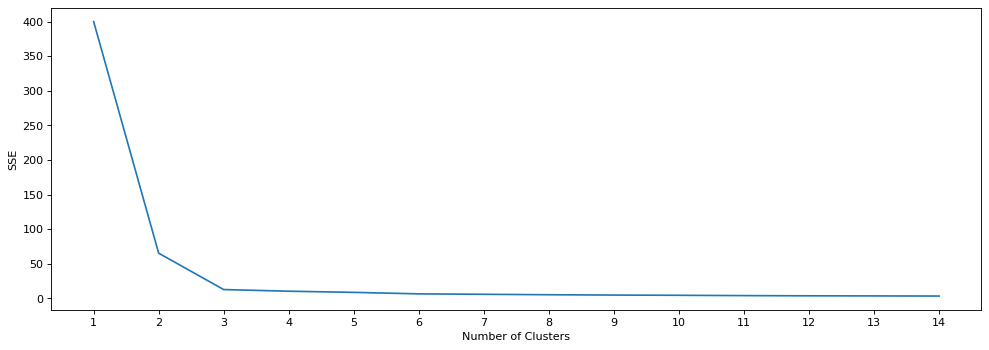

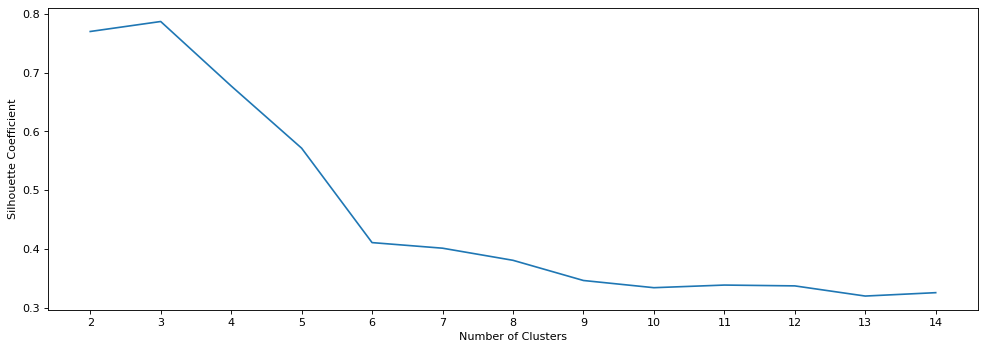

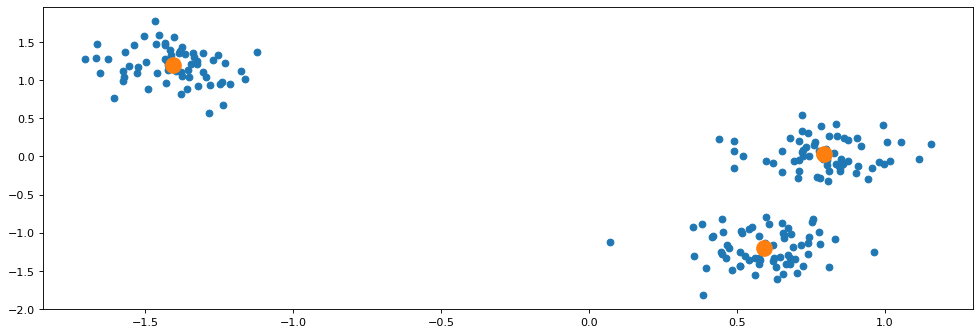

The optimal number of clusters is 3
Center 0 -> [-1.4064079651333647,1.1910625078938293]
Center 1 -> [0.7953202012965992,0.031196306979414543]
Center 2 -> [0.5900966001780587,-1.2044817625166195]
With a Sillouette score of -> 0.7868198662180235


In [14]:
formatElbowOutput(elbowAnalysis(blobs, 15))

## Run with the Moons Dataset

Checking for correct Number of Clusters:   0%|          | 0/14 [00:00<?, ?it/s]

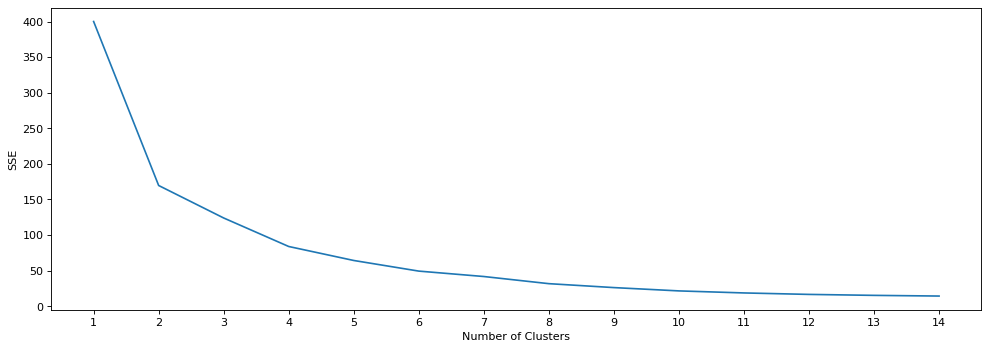

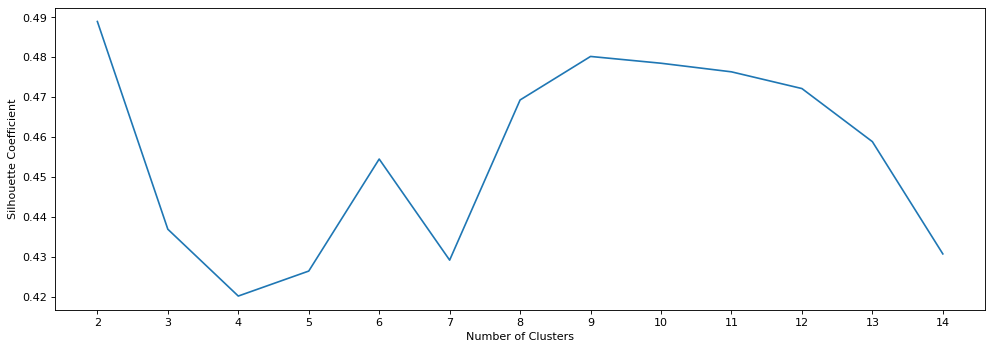

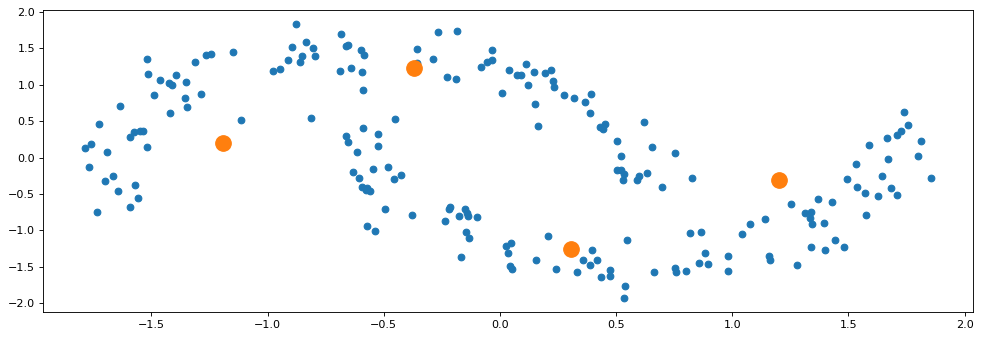

The optimal number of clusters is 4
Center 0 -> [-1.1916035990239502,0.19853541012947495]
Center 1 -> [0.3072347399755298,-1.2565689135675444]
Center 2 -> [-0.3692867594791626,1.2296262637020396]
Center 3 -> [1.1999918950426474,-0.302268130681438]
With a Sillouette score of -> 0.42024582687708717


In [15]:
formatElbowOutput(elbowAnalysis(moons,15))

## Run with the Circles Dataset

Checking for correct Number of Clusters:   0%|          | 0/14 [00:00<?, ?it/s]

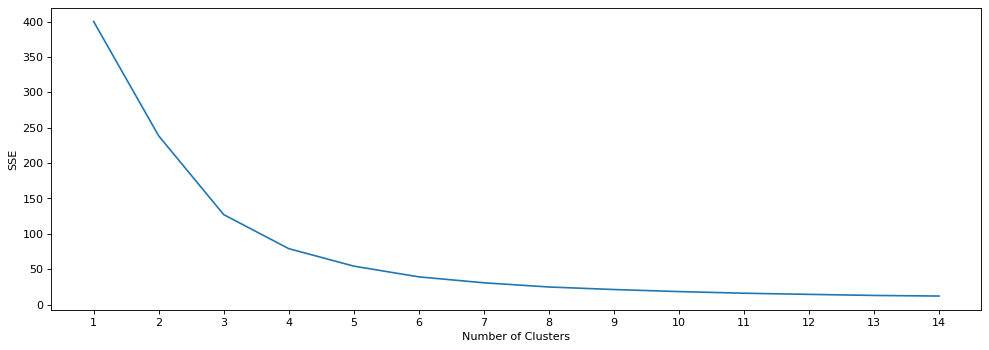

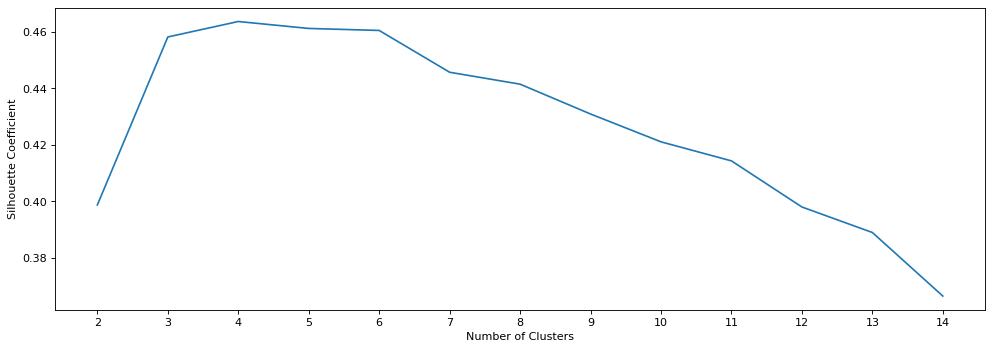

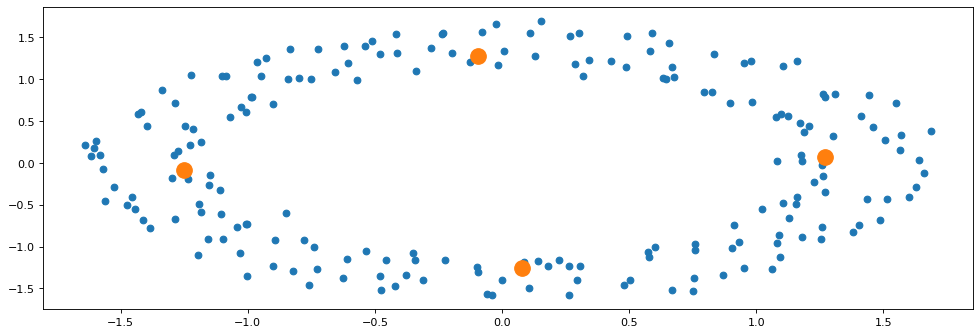

The optimal number of clusters is 4
Center 0 -> [1.2686442620618084,0.07044885495195913]
Center 1 -> [-0.09540220773788778,1.2760255365552657]
Center 2 -> [0.0791511297177148,-1.2593246877209854]
Center 3 -> [-1.2523931840416351,-0.0871497037862394]
With a Sillouette score of -> 0.46361220262537745


In [16]:
formatElbowOutput(elbowAnalysis(circles, 15))

## Explaining the Results

While k-means clustering is a very good solution for clusters of dense data or random data.

K-means has the disadvantage of not being able to correctly distinguish clusters of anormal shapes, such is the case for the **circles dataset** and the **moons dataset** as in both of those examples the algorithm predicted that the number of correct clusters is **4**, being the correct anwer **2**. 

This can be seen as it is not the correct answer in the sillouette scores of the moons and circles datasets, being no more than 50%, while in the blobs data set it is almost 80%, clearly being the blobs closer to the correct answer over the circles and moons.

### Other Solutions

Doing some research there is apparently another clustering algorithm called **Spectral Clustering**, which uses a neat trick of joining groups of points in a single clustering while trying to locate them in other dimensions like in the picture below.

<img src="https://scw-aberystwyth.github.io/machine-learning-novice/fig/spectral_concentric_3d.png" />
<img src="https://scw-aberystwyth.github.io/machine-learning-novice/fig/spectral_concentric_circle.png" />

Being this image the result of applying spectral clustering to the circles dataset.

This info can be found in [this link](https://scw-aberystwyth.github.io/machine-learning-novice/04-clustering/index.html) where it is explained in more detail.

One disadvantage of using spectral clustering over k-means, the article explains, is that it is computationally more expensive. As it has to try different combinations and trying to find solutions in a higher number of dimensions.

## Conclusion

K-means is a good clustering algorithm as it can provide relatively good results in a short period of time, being a plus if you know how many clusters are there, if that is not the case there are supporting tools that can help to find those answers.

However, like in most cases of AI & Machine Learning, some tools are better suited for the job than others, the k-means clustering algorithm does have some limitations. 

Where other tools like Spectral Clustering have no such problems, but are computationally more expensive. K-means brings value to the table by being an unsupervised learning algorithm and by being relatively fast compared to other more complex algorithms.

### Resources

 - Tutorial for k-means clustering https://realpython.com/k-means-clustering-python/
     - [Direct Link](https://realpython.com/k-means-clustering-python/)
 - Explanation for the Spectral Clustering part https://scw-aberystwyth.github.io/machine-learning-novice/04-clustering/index.html
     - [Direct Link](https://scw-aberystwyth.github.io/machine-learning-novice/04-clustering/index.html)